In [2]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

polynomial_func = lambda x: 4*x**3 -  x**2 + 3*x - 2
exponential_func = lambda x: 7*x**2 + np.exp(3*x) - 3
logarithmic_func = lambda x: np.log(x + 1)

##  metoda puleni intervalu
def metoda_puleni(f, a, b, max_error):
    
    if f(a)*f(b) >= 0:
        raise ValueError("It won't work since the root is not included in the interval")

    start_time = timeit.default_timer()
    c = a

    while abs(b-a) > max_error:
        c = (a + b) / 2

        if (f(c) == 0.0):
            break

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    end_time = timeit.default_timer()
    return c, end_time - start_time

def newton_raphson(f, x, error, max_steps):
    start_time = timeit.default_timer()
    def df(x):
        
        h = 0.0001
        return (f(x+h)-f(x-h))/(2*h)

    for i in range(max_steps):
        xnew = x - f(x)/df(x)
        if abs(xnew-x) < error:
            break
        x=xnew
    end_time = timeit.default_timer()
    return xnew, end_time - start_time

def plot(f, a, b, title, method):
    if method=="Metoda puleni":
        print("Metoda puleni")
        x = metoda_puleni(f, a, b, 0.0001)[0]
        time = str(metoda_puleni(f, a, b, 0.0001)[1]) + " sec"
    else:
        print("Newton-Raphson")
        x = newton_raphson(f, 0, 0.0001, 100)[0]
        time = newton_raphson(f, 0, 0.0001, 100)[1]
    print("root: ", x)
    print(f"Time taken: {time}")
    plt.title(title)
    plt.plot(x, f(x), "bo")
    plt.plot(np.linspace(a, b, 100), f(np.linspace(a, b, 100)), "b") 
    plt.show()







Metoda puleni
root:  0.54766845703125
Time taken: 2.2899999748915434e-05 sec


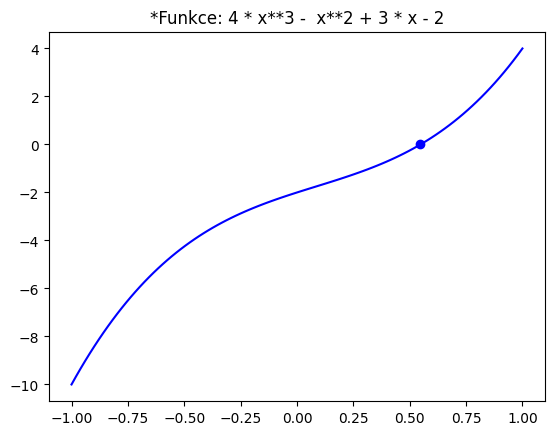

Newton-Raphson
root:  0.5476435726836218
Time taken: 1.0799994925037026e-05


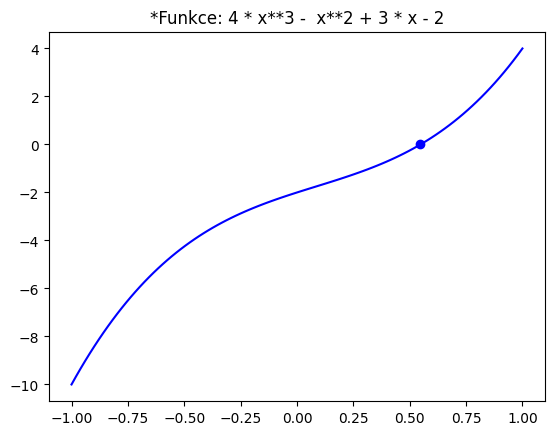

In [4]:
plot(polynomial_func, -1, 1, "*Funkce: 4 * x**3 -  x**2 + 3 * x - 2", "Metoda puleni")
plot(polynomial_func, -1, 1, "*Funkce: 4 * x**3 -  x**2 + 3 * x - 2", "Newton-Raphson")

Metoda puleni
root:  0.29217529296875
Time taken: 6.510000093840063e-05 sec


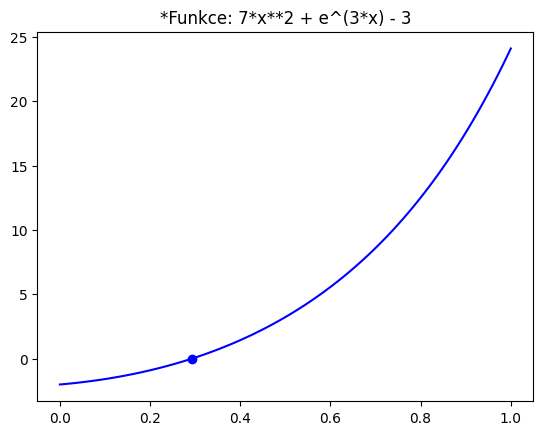

Newton-Raphson
root:  0.2921661502155241
Time taken: 3.309999010525644e-05


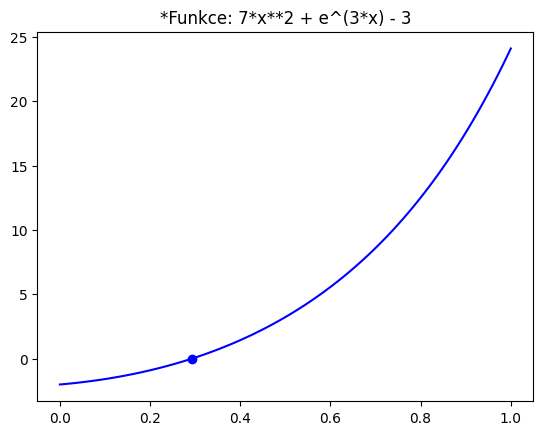

In [5]:
plot(exponential_func, 0, 1, "*Funkce: 7*x**2 + e^(3*x) - 3", "Metoda puleni")
plot(exponential_func, 0, 1, "*Funkce: 7*x**2 + e^(3*x) - 3", "Newton-Raphson")

Metoda puleni
root:  -3.967285156251461e-05
Time taken: 5.060000694356859e-05 sec


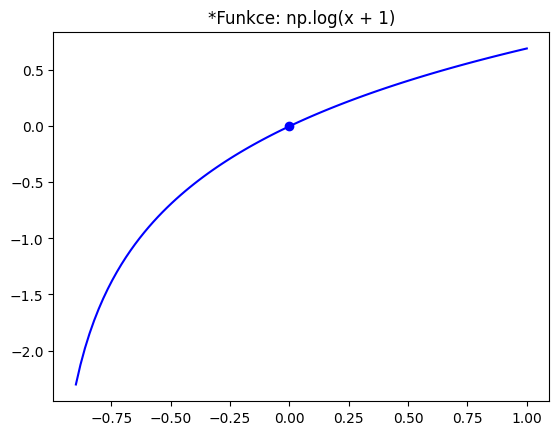

Newton-Raphson
root:  0.0
Time taken: 5.399982910603285e-06


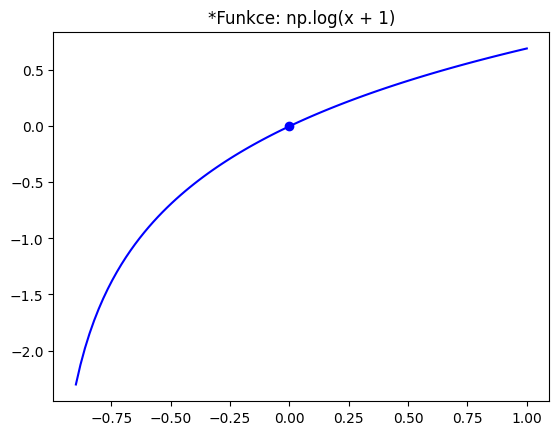

In [8]:
plot(logarithmic_func, -0.9, 1, "*Funkce: np.log(x + 1)", "Metoda puleni")
plot(logarithmic_func, -0.9, 1, "*Funkce: np.log(x + 1)", "Newton-Raphson")